## Exercise questions from (ISLP, Chapter 3, number 10, p. 130)

In [54]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.com/py"

### (a) Multiple linear regression (using the Carseats data.)
#### Fit a multiple regression model to predict _Sales_ using _Price_, _Urban_, and _US_  

In [55]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
carseats_df = pd.read_csv("Carseats.csv")

### Fit the multiple linear regression
results = smf.ols("Sales ~ Price + Urban + US" , data=carseats_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.39e-23
Time:                        23:35:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

### (b) Model interpretation
#### Provide an interpretation of each coefficient in the model. 
- Intercept: the predicted value of the dependent variable (y) when all independent variables (x) are zero. 
- $\beta_{Price}$: For all other variables remaining constant, an increase in price of a single unit (dollar) results in an average decrease in unit sales of 0.0545.
- $\beta_{Urban}$: For all other variables remaining constant, an urban state will decrease the average sales by 0.0219. However this result is statistically insignificant.
- $\beta_{US}$: For all other variables remaining constant, a US state will increase the average sales by 1.2.

### (c) Equation form of the model
#### Write out the model in equation form. 

The model can be written as, 
Y = $\beta_{0}$ + $\beta_{Price}$ $X_{Price}$ + $\beta_{US}$ $X_{US}$ + $\beta_{Urban}$ $X_{Urban}$ , where $X_{i}=[0,1]$ for 'Yes' and 'No' respectively.  
This will result in 4 separate equations based on the values of the qualitative variables.


### (d) Rejection of the null hypothesis
#### For which of the predictors can you reject the null hypothesis $H_{0}$ : $\beta_{j}$ = 0 ?  

The _Urban_ coefficient has a large P value (0.936) and therefore is statistically insignificant.

### (e) Fit a smaller model (e.g. without Urban) 
#### On the basis of response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.  

The OLS regression model evaluates the association between Sales and the predictors: Price, Urban, and US. Statistical significance is determined using p-values, t-statistics, and confidence intervals. 
- Price has a negative coefficient (-0.0545), a highly significant p-value (0.000), and a large negative t-statistic (-10.389), indicating a strong inverse relationship with Sales. Higher prices are associated with lower sales. 
- Urban has a very small coefficient (-0.0219), an extremely high p-value (0.936), and a near-zero t-statistic (-0.081), suggesting no meaningful impact on Sales. 
- US has a positive coefficient (1.2006), a significant p-value (0.000), and a large t-statistic (4.635), indicating that Sales are higher in the US. 
Key statistical evidence includes low p-values (<0.05) for Price and US, large absolute t-statistics for these predictors, and confidence intervals that do not include zero. __Urban is not statistically significant__, as its confidence interval includes zero.

In [56]:
### Fit the new smaller model without Urban
results = smf.ols("Sales ~ Price + US" , data=carseats_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           2.66e-24
Time:                        23:35:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (f) Model comparison
#### How well do models in (a) and (e) fit the data?  

Both OLS models show modest explanatory power, with R-squared values of 0.239, meaning approximately 24% of the variation in Sales is explained by the predictors in each model. The inclusion of the Urban variable in the first model does not improve the model’s fit, as evidenced by identical R-squared values and a nearly identical log-likelihood. 
the adjusted R-squared slightly increases in the second model (0.234 to 0.235), indicating a marginally better fit when the insignificant Urban variable is removed. 
Additionally, both models have strong overall significance (F-statistics: 41.52 and 62.43, with p-values < 0.001), confirming that the predictors, particularly Price and US, contribute meaningfully to explaining Sales.  
- Ultimately, __neither model fits the data well__ based on the summary statistics.  
- The low $R^2$ values suggest that there is a significant amount of unexplained variance in the models.

### (g) Confidence intervals
Using the model from (e), obtain 95% confidence intervals for the coefficients.  
Based on the OLS model "Sales ~ Price + US", the 95% confidence intervals for the model coefficients are as follows: 
- Intercept: [11.790, 14.271]
- US[T.Yes]: [0.692, 1.708]
- Price: [-0.065, -0.044]  
These intervals represent the range within which we are 95% confident that the true values of the coefficients lie. 

In [57]:
# import pandas as pd
# import statsmodels.formula.api as smf

# Fit the smaller model without 'Urban'
results = smf.ols("Sales ~ Price + US", data=carseats_df).fit()

# Display the summary (includes 95% CI)
# print(results.summary())

# Extract 95% confidence intervals
conf_int = results.conf_int(alpha=0.05)
conf_int.columns = ['Lower Bound', 'Upper Bound']
print("\n95% Confidence Intervals:\n", conf_int)



95% Confidence Intervals:
            Lower Bound  Upper Bound
Intercept     11.79032    14.271265
US[T.Yes]      0.69152     1.707766
Price         -0.06476    -0.044195


### (h) Outlier and Leverage Diagnostics.
Is there evidence of outliers or high leverage observations in the model from (e) ?  

Based on the regression summary, the Omnibus (0.717) and Jarque-Bera (0.688) tests suggest that residuals are approximately normally distributed, and Durbin-Watson (1.912) indicates no strong autocorrelation. However, these tests alone do not detect outliers or high-leverage points. In fact the diagnostic plots look pretty good, but the $R^2$ value is still low.

To detect such issues visually, we use the following 4 standard diagnostic plots: 
- Residuals vs. Fitted: Checks non-linearity and unequal error variance.
- Normal Q-Q: Checks if residuals are normally distributed.
- Scale-Location (Spread vs. Fitted): Checks homoscedasticity.
- Residuals vs. Leverage: Identifies influential outliers.  

From the plots we see:
* No outliers. From the Residual plots we can see that there are no significant outliers 
* No High Leverage Point: From the leverage plot there are no points outside of the cook lines and therefore no points of hgh leverage. 
* Normal distribution of errors: From the residual QQ plot the residual errors follow a normal distribution. 
* heteroscedasticity: We see there is no trend in the absolute value of the residuals and therefore there is no trend in the error of the model. 


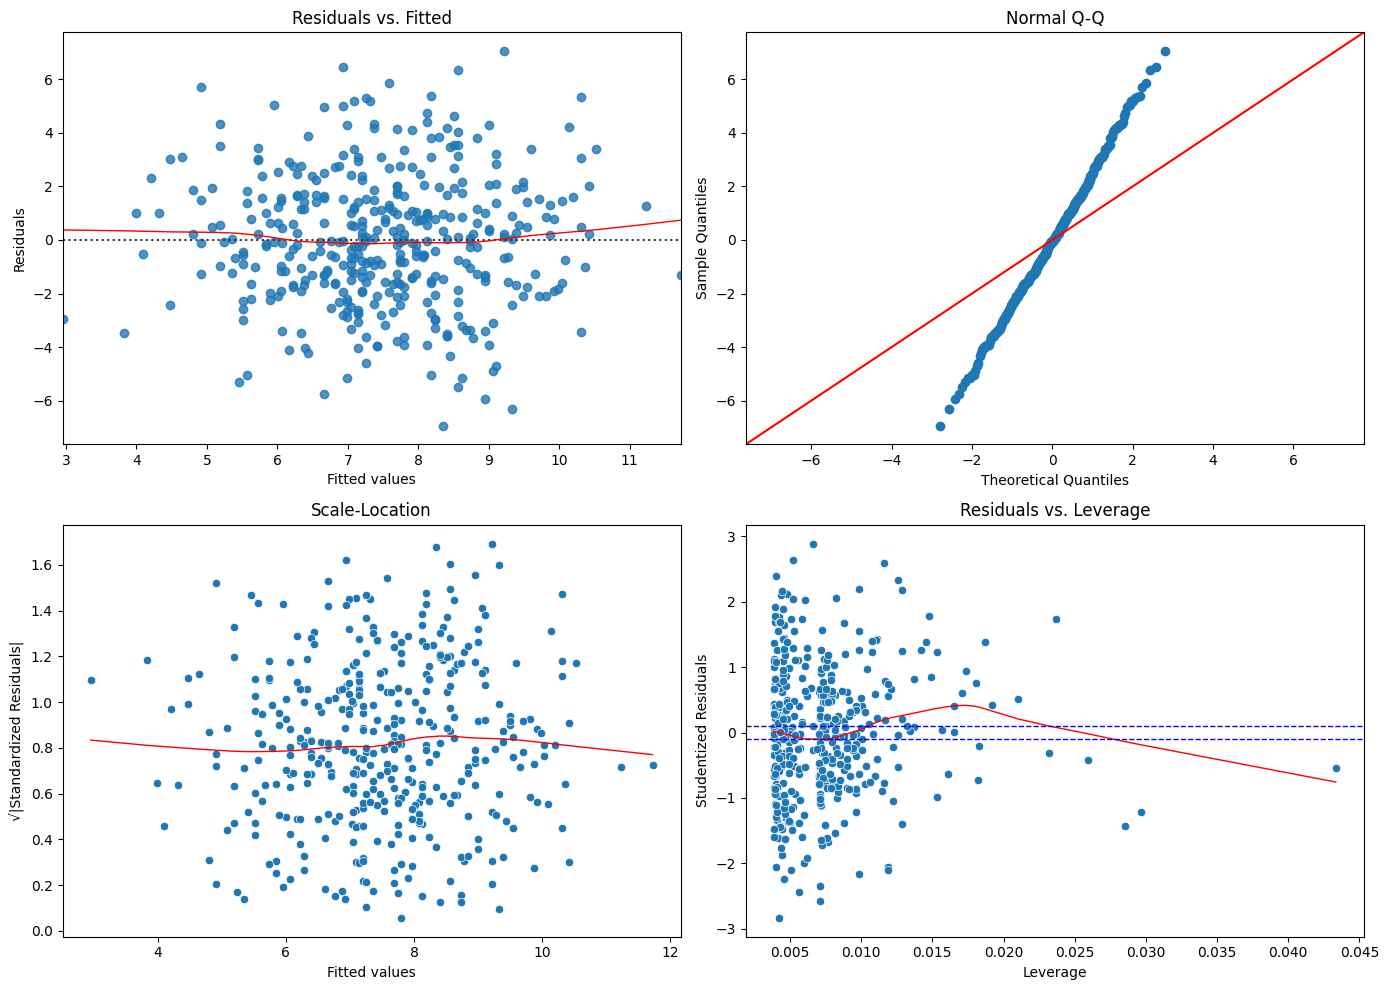

In [58]:
# import statsmodels.formula.api as smf
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# import seaborn as sns

# Fit the OLS model
model = smf.ols("Sales ~ Price + US", data=carseats_df).fit()

# Extract values needed for plots
fitted = model.fittedvalues
residuals = model.resid
influence = model.get_influence()
leverage = influence.hat_matrix_diag
studentized_residuals = influence.resid_studentized_external
cooks_d = influence.cooks_distance[0]
standardized_residuals = residuals / np.std(residuals)
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# Set up 2-column subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs. Fitted
sns.residplot(x=fitted, y=residuals, lowess=True, ax=axs[0, 0],
              line_kws={'color': 'red', 'lw': 1})
axs[0, 0].set_title("Residuals vs. Fitted")
axs[0, 0].set_xlabel("Fitted values")
axs[0, 0].set_ylabel("Residuals")

# 2. Normal Q-Q
sm.qqplot(residuals, line='45', ax=axs[0, 1])
axs[0, 1].set_title("Normal Q-Q")

# 3. Scale-Location
sns.scatterplot(x=fitted, y=sqrt_standardized_residuals, ax=axs[1, 0])
sns.regplot(x=fitted, y=sqrt_standardized_residuals, scatter=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 0])
axs[1, 0].set_title("Scale-Location")
axs[1, 0].set_xlabel("Fitted values")
axs[1, 0].set_ylabel("√|Standardized Residuals|")

# 4. Residuals vs. Leverage with Cook's Distance
sns.scatterplot(x=leverage, y=studentized_residuals, ax=axs[1, 1])
sns.regplot(x=leverage, y=studentized_residuals, scatter=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 1])
# Add Cook's distance lines
p = model.df_model + 1  # number of predictors + intercept
n = model.nobs
threshold = 4 / n
axs[1, 1].axhline(y=np.sqrt(threshold), color='blue', linestyle='--', lw=1)
axs[1, 1].axhline(y=-np.sqrt(threshold), color='blue', linestyle='--', lw=1)
axs[1, 1].set_title("Residuals vs. Leverage")
axs[1, 1].set_xlabel("Leverage")
axs[1, 1].set_ylabel("Studentized Residuals")

# Final formatting
plt.tight_layout()
plt.show()


### Part of the Concept question in (ISLP, Chapter 3, number 3b, pp. 127-128)


In [59]:
# Part of the Concept question in (ISLP, Chapter 3, number 3b, pp. 127-128)
# level 1 - college grad, 0 -high school grad
def f(gpa, iq, level):
    y = 50 + 20*gpa + 0.07*iq + 35*level +0.01*gpa*iq + (-10*gpa*level)
    return y 

gpa = 4.0
iq = 110
level = 1

print('$' + str(f(gpa,iq,level) * 1000 ))

$137100.0
